In [112]:
import numpy as np
import matplotlib.pyplot as plt

## The request output part (Exp 1)
First experiment with 50 requests in total, 4 requests were rejected (not enqueued) 
With a probability of appr. 70% + 10%, user 2 requests arrived. The rest was left to users 0 and 1.
```
double rNum = random.nextDouble();
if (rNum > 0.3) {                               # 70% user 2
    user = new User(2, ++cnt);
else
    user = new User(random.nextInt(3), ++cnt);  # 10% user 2
```

### This is a legend to the data in the csv files:

In [113]:
# IN,  1,     2,1852440846143583, 0,    1,         1
#
#  0,  1  ,   2  ,   3    ,   4   ,     5    ,     6
#
# IN, round, UID, arriTime, deqTime, prioQed,  requestID

#
#prioQed legend:
# F ---> 0    #Fast Queue
# S ---> 1    #Slow Queue
# R ---> 2    #Rejected (not enqueued)

In [129]:
# import csv data TODO

#Exp1: 50 req
#rNum > 0.3 for user 2 and user = new User(random.nextInt(3), ++cnt); for the user 0 and 1 AND 2 also!!
#data_all = np.genfromtxt("sorted_log.2024-08-22T23:20:00.212427.csv", delimiter=',')
#num_rejected = 4 # iterate through csv and count 'R's!

#Exp2: 50 req
#rNum > 0.5 for user 2 and user = new User(random.nextInt(2!!!not 3), ++cnt); for the user 0 and 1
#data_all = np.genfromtxt("sorted_exp2_log.2024-08-29T17:07:01.272412.csv", delimiter=',')
#num_rejected = 0 # iterate through csv and count 'R's!

#Exp3: 500 req
#rNum > 0.3 for user 2 and user = new User(random.nextInt(3), ++cnt); for the user 0 and 1 AND 2 also!!
#PENALTY_LIMIT = REQUEST_COUNT_LIMIT + 50; //was @ 10
#REQUEST_COUNT_LIMIT = 30 //was 5
data_all = np.genfromtxt("sorted_exp3_log.2024-08-29T18:56:19.FS_no_R.csv", delimiter=',')
#num_rejected = 0 # iterate through csv and count 'R's!

In [130]:
#num_rejected = [ i for i in range(len(data_all)) if data_all[i, 5] == "F"]
num_rejected = 0
for i in range(len(data_all)):
    if data_all[i, 5] == 2:
        num_rejected += 1
num_rejected

0

In [132]:
arri_dq_t = 4   # 3 is cv index for arriTime and 4 is deqTime
UID = 2         #csv index for user id

total_requests = 500

csv_row_upper = (len(data_all) // 2)

csv_row_lower = len(data_all)  - 1
total_time_IN =  data_all[csv_row_lower, arri_dq_t] - data_all[csv_row_upper, arri_dq_t]

total_time_IN, csv_row_lower, data_all[csv_row_lower,arri_dq_t], data_all[csv_row_upper, arri_dq_t]

(135849750.0, 559, 2130012759931500.0, 2130012624081750.0)

In [133]:
amount_intervalls = 14
time_intervall = total_time_OUT / amount_intervalls
time_intervall

9703553.57142857

In [135]:
len_all = len(data_all)
len_clean = len_all - num_rejected
len_OUT_part = (len_clean // 2)
len_IN_part = csv_row_upper 
len_all, len_clean, len_IN_part, len_OUT_part

(560, 560, 280, 280)

In [126]:
#version 1. Not good because intervalls are not equidistant!!

#arr0 = np.zeros([amount_intervalls])
#arr1 = np.zeros([amount_intervalls])
#arr2 = np.zeros([amount_intervalls])
#lower_bound = data_all[0,3]
#for k in range((amount_intervalls - 1), -1, -1):
#    upper_bound = latest_arrvl - (time_intervall * k)
#    for i in range(len_IN_part):
#        time = data_all[i,3]  
#        if lower_bound <= time <= upper_bound:
#            match data_all[i,2]:
#                case 0: 
#                    arr0[9-k] = arr0[9-k] + 1
#                case 1: 
#                    arr1[9-k] = arr1[9-k] + 1
#                case 2: 
#                    arr2[9-k] = arr2[9-k] + 1
#    lower_bound = upper_bound
#    
#arr0.sum(), arr1.sum(), arr2.sum(), arr0, arr1, arr2    

In [136]:
arr0 = np.zeros([amount_intervalls])
arr1 = np.zeros([amount_intervalls])
arr2 = np.zeros([amount_intervalls])
arr3 = np.zeros([amount_intervalls])
upper_idx = len_OUT_part // amount_intervalls
lower_bound = data_all[csv_row_upper, arri_dq_t]
for k in range(1, amount_intervalls + 1):
    arr_idx = k-1
    upper_bound = data_all[(csv_row_upper + (k*upper_idx) - 1), arri_dq_t]
    for i in range(csv_row_upper, csv_row_upper + len_OUT_part):
        time = data_all[i, arri_dq_t]
        #print(lower_bound, time, upper_bound)
        if lower_bound <= time < upper_bound:
            #print(lower_bound, time, upper_bound)
            match data_all[i, UID]:
                case 0:
                    if data_all[i,5] == 2:
                        arr3[arr_idx] += 1
                        continue
                    arr0[arr_idx] += 1
                    #print("0:",arr0)
                case 1:
                    if data_all[i,5] == 2:
                        arr3[arr_idx] += 1
                        continue
                    arr1[arr_idx] += 1
                    #print("1:",arr1)
                case 2:
                    if data_all[i,5] == 2:
                        arr3[arr_idx] += 1
                        continue
                    arr2[arr_idx] += 1
                    #print("2:",arr2)
    lower_bound = upper_bound
    #print("--------")
    
arr0.sum(), arr1.sum(), arr2.sum(), arr0, arr1, arr2, arr3
        

(39.0,
 50.0,
 190.0,
 array([2., 2., 0., 4., 2., 4., 1., 3., 1., 1., 3., 5., 2., 9.]),
 array([ 4.,  2.,  3.,  3.,  0.,  1.,  3.,  2.,  3.,  7.,  2.,  0.,  9.,
        11.]),
 array([13., 16., 17., 13., 18., 15., 16., 15., 16., 12., 15., 15.,  9.,
         0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

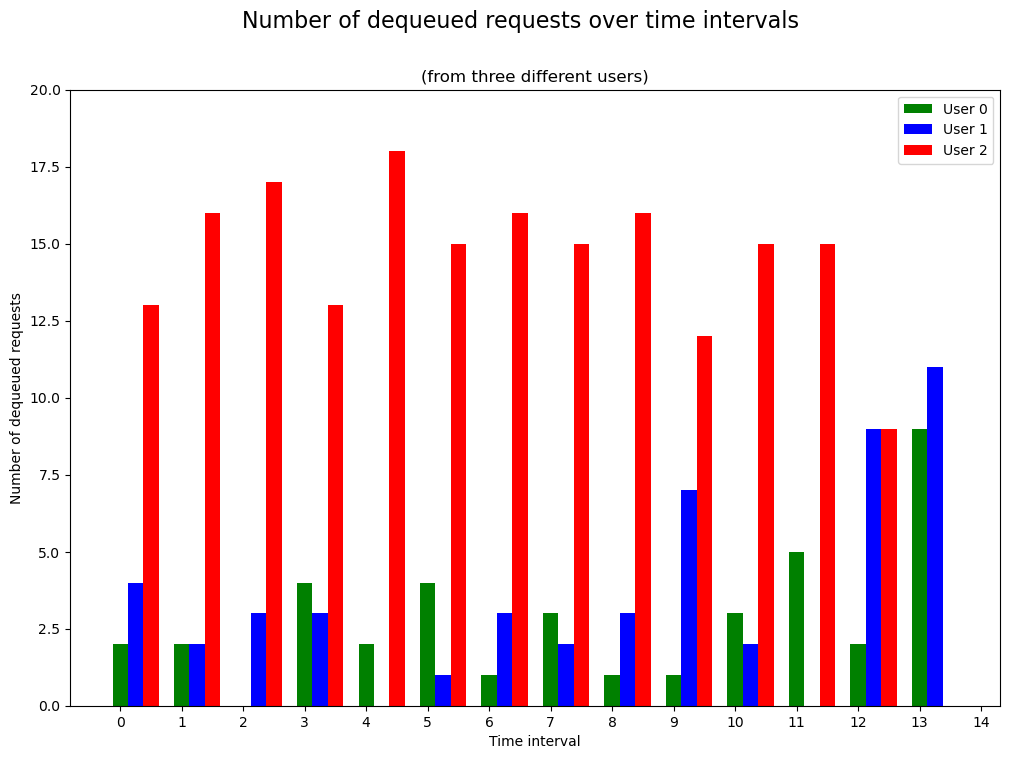

(39.0,
 50.0,
 190.0,
 array([2., 2., 0., 4., 2., 4., 1., 3., 1., 1., 3., 5., 2., 9.]),
 array([ 4.,  2.,  3.,  3.,  0.,  1.,  3.,  2.,  3.,  7.,  2.,  0.,  9.,
        11.]),
 array([13., 16., 17., 13., 18., 15., 16., 15., 16., 12., 15., 15.,  9.,
         0.]))

In [137]:

x = [i for i in range(amount_intervalls)]
width=0.25
#alpha=0.5
ax = plt.figure(figsize=[12, 8])
plt.bar(np.arange(len(arr0)) ,arr0, width,align='center', label='User 0' , color='g')
plt.bar(np.arange(len(arr1)) + width ,arr1, width, align='center',  label='User 1', color='b')
plt.bar(np.arange(len(arr2)) + width*2,arr2, width,align='center',label='User 2' , color='r')
plt.xlabel('Time interval')
plt.ylabel('Number of dequeued requests')
plt.suptitle('Number of dequeued requests over time intervals', fontsize=16)#, y=1.00)
plt.ylim(0,20)
plt.title('(from three different users)')
plt.xticks(np.arange(len(x)+ width))
plt.legend()

plt.show()

arr0.sum(), arr1.sum(), arr2.sum(),arr0, arr1, arr2